<a href="https://colab.research.google.com/github/djs21905/Machine-Learning/blob/master/SmithAssignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest






In [0]:
import pandas as pd

test = pd.read_csv("https://msds422smith.s3.amazonaws.com/test.csv")
train = pd.read_csv("https://msds422smith.s3.amazonaws.com/train.csv")

In [0]:
(train.shape, test.shape)

((42000, 785), (28000, 784))

In [0]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# EDA

In [0]:
# Evenly distributed 
train["label"].value_counts().sort_values(ascending=False)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## Pre-Processing


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
import numpy as np 

tf.__version__
keras.__version__

'2.2.4-tf'

In [0]:
from sklearn.model_selection import train_test_split

x = train.iloc[:,1:]
y = train.iloc[:,0]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .20)


x_train.shape, x_test.shape, y_train.shape, y_test.shape


x_train = x_train.to_numpy()

x_train = x_train.reshape(len(x_train),28,28)

x_test = x_test.to_numpy()

x_test = x_test.reshape(len(x_test),28,28)

y_train = y_train.to_numpy()

y_test = y_test.to_numpy()

x_test.shape, x_train.shape , y_train.shape

((8400, 28, 28), (33600, 28, 28), (33600,))

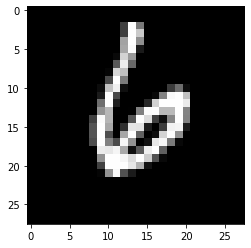

In [0]:
plt.figure()
plt.imshow(x_train[0], cmap = "gray")
plt.grid(False)
plt.show()

In [0]:
# Normalize features

x_train = x_train / 255.0

x_test =  x_test / 255.0

test = test / 255.0


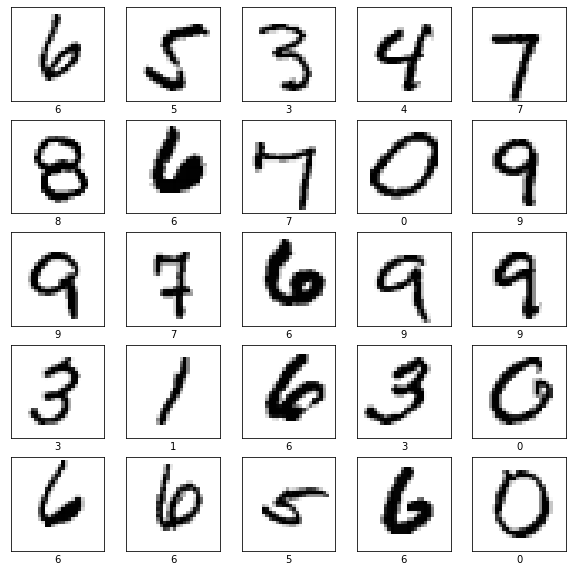

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


# Model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.layers import Activation, Dense

def create_model(n_hidden = 2 ,n_neurons = 30):
    # create model
    model = keras.Sequential() 
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
   
              
    for item in range(n_hidden):        
      model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    # Compile model
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Converts Keras object to model object that can be used w/ sklearn
model=KerasClassifier(build_fn=create_model,verbose=1,epochs = 10)  




In [0]:
y_train_cv = np.concatenate((y_train,y_test),axis = 0)
x_train_cv = np.concatenate((x_train,x_test),axis = 0)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

number_of_layers = np.arange(5,10,1)
neurons_per_layer = np.arange(1,1000,1)

params_dist = dict(n_hidden = number_of_layers, n_neurons = neurons_per_layer)


random_search = RandomizedSearchCV(model,param_distributions = params_dist, n_iter = 5, random_state = 42, verbose = True)

In [0]:
import timeit
start_time2 = timeit.default_timer()

random_search.fit(x_train_cv,y_train_cv)

elapsed2 = timeit.default_timer() - start_time2

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Train on 28000 samples
Epoch 1/10
28000/28000 [==============================] - 8s 299us/sample - loss: 0.3178 - acc: 0.9069
Epoch 2/10
28000/28000 [==============================] - 8s 278us/sample - loss: 0.1631 - acc: 0.9566
Epoch 3/10
28000/28000 [==============================] - 8s 280us/sample - loss: 0.1155 - acc: 0.9695
Epoch 4/10
28000/28000 [==============================] - 8s 279us/sample - loss: 0.0888 - acc: 0.9764
Epoch 5/10
28000/28000 [==============================] - 8s 278us/sample - loss: 0.0786 - acc: 0.9794
Epoch 6/10
28000/28000 [==============================] - 8s 292us/sample - loss: 0.0675 - acc: 0.9822
Epoch 7/10
28000/28000 [==============================] - 8s 285us/sample - loss: 0.0705 - acc: 0.9818
Epoch 8/10
28000/28000 [==============================] - 8s 284us/sample - loss: 0.0556 - acc: 0.9861
Epoch 9/10
28000/28000 [==============================] - 8s 284us/sample - loss: 0.0440 - ac

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 20.8min finished


Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 11s 267us/sample - loss: 0.2583 - acc: 0.9226
Epoch 2/10
42000/42000 [==============================] - 10s 245us/sample - loss: 0.1285 - acc: 0.9641
Epoch 3/10
42000/42000 [==============================] - 10s 247us/sample - loss: 0.0944 - acc: 0.9737
Epoch 4/10
42000/42000 [==============================] - 10s 244us/sample - loss: 0.0759 - acc: 0.9790
Epoch 5/10
42000/42000 [==============================] - 10s 247us/sample - loss: 0.0657 - acc: 0.9821
Epoch 6/10
42000/42000 [==============================] - 10s 245us/sample - loss: 0.0550 - acc: 0.9853
Epoch 7/10
42000/42000 [==============================] - 10s 244us/sample - loss: 0.0483 - acc: 0.9872
Epoch 8/10
42000/42000 [==============================] - 10s 242us/sample - loss: 0.0455 - acc: 0.9880
Epoch 9/10
42000/42000 [==============================] - 10s 240us/sample - loss: 0.0384 - acc: 0.9898
Epoch 10/10
42000/42000 [================

In [0]:
str1 = "It took {} (s) for RandomizedSearchCV to complete"
print(str1.format(elapsed2))

It took 1355.6388959789983 (s) for RandomizedSearchCV to complete


In [0]:
random_search.best_params_

{'n_hidden': 5, 'n_neurons': 467}

In [0]:
results = pd.DataFrame(random_search.cv_results_)

results.columns
cols = ["Mean Test Accuracy", "#Neuron/Layer","# Hidden Layers", "Mean Fit Time(s)"]
results.set_index("rank_test_score",inplace=True)
results = results[["mean_test_score","param_n_neurons", "param_n_hidden", "mean_fit_time"]]
results.columns = cols 


results.sort_values(by = "rank_test_score",axis = 0)

,Mean Test Accuracy,#Neuron/Layer,# Hidden Layers,Mean Fit Time(s)
rank_test_score,,,,
1,0.972452,467,5,68.256940
2,0.970548,861,5,83.888837
3,0.967548,96,8,61.098169
4,0.967524,431,9,84.694008
5,0.966476,776,8,100.020785


In [0]:
test_oos = test.to_numpy().reshape(len(test),28,28)
predictions = random_search.predict(test_oos)

28000/28000 [==============================] - 4s 151us/sample


# Export Test Results to Kaggle

In [0]:
ann_export = pd.DataFrame(predictions, index = np.arange(1,28001,1) , columns = ["Label"])
ann_export.index.name = 'ImageId'
ann_export.to_csv("preds.csv")
ann_export

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3
